## Dataset Feature Description: Online Shoppers Purchasing Intention

### 1. General Information
- 총 12,330개의 세션 데이터
- 각 세션은 서로 다른 사용자에 대한 1년간의 행동 데이터로 구성됨
- 특정 캠페인, 기념일, 사용자 프로필 등에 편향되지 않도록 설계됨
- `Revenue` 컬럼은 타겟 변수 (class label)로 사용

---

### 2. 수치형(Numerical) Features (10개)

| No | Column Name                  | 설명 |
|----|------------------------------|------|
| 1  | Administrative               | 방문자가 본 행정 관련 페이지 수 |
| 2  | Administrative_Duration      | 행정 페이지에 머문 총 시간 |
| 3  | Informational                | 정보 제공용 페이지 수 (예: FAQ) |
| 4  | Informational_Duration       | 정보 제공 페이지에 머문 총 시간 |
| 5  | ProductRelated               | 상품 관련 페이지 수 |
| 6  | ProductRelated_Duration      | 상품 관련 페이지에 머문 총 시간 |
| 7  | BounceRates                  | 첫 페이지만 보고 이탈한 비율 (0~1) |
| 8  | ExitRates                    | 해당 페이지가 세션 마지막 페이지인 비율 (0~1) |
| 9  | PageValues                   | 거래 성사 전 페이지의 평균 기여도 |
| 10 | SpecialDay                   | 특정 기념일과의 시간적 근접성 (0~1, 1에 가까울수록 가까운 날) |

---

### 3. 범주형(Categorical) Features (8개)

| No | Column Name         | 설명 |
|----|---------------------|------|
| 1  | Month               | 방문 월 (예: 'Feb', 'Mar' 등) |
| 2  | OperatingSystems    | 운영체제 코드 (숫자형 범주) |
| 3  | Browser             | 브라우저 코드 (숫자형 범주) |
| 4  | Region              | 지역 코드 |
| 5  | TrafficType         | 유입 트래픽 유형 코드 |
| 6  | VisitorType         | 방문자 유형 (`Returning_Visitor`, `New_Visitor`, `Other`) |
| 7  | Weekend             | 주말 방문 여부 (`True`, `False`) |
| 8  | Revenue             | 구매 여부 (`True`: 구매함 / `False`: 구매하지 않음) → 타겟 변수 |

---

### 4. 예측 목표
- `Revenue` 컬럼 예측: 해당 세션에서 구매가 발생했는지 여부를 분류

---

### 5. 참고 사항
- `BounceRates`, `ExitRates`, `PageValues`는 Google Analytics 기준 메트릭
- `SpecialDay`는 기념일 전후의 기간을 고려한 특수 이벤트 정보 반영


In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
BASE_PATH = os.getcwd()
DATA_PATH = BASE_PATH + r'\online_shoppers_intention.csv'

df = pd.read_csv(DATA_PATH, encoding='utf-8')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [10]:
# 숫자형 컬럼만 필터링
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(f"수치형 변수({len(numeric_cols)}): {numeric_cols}")

수치형 변수(14): Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType'],
      dtype='object')


수치형 변수: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']


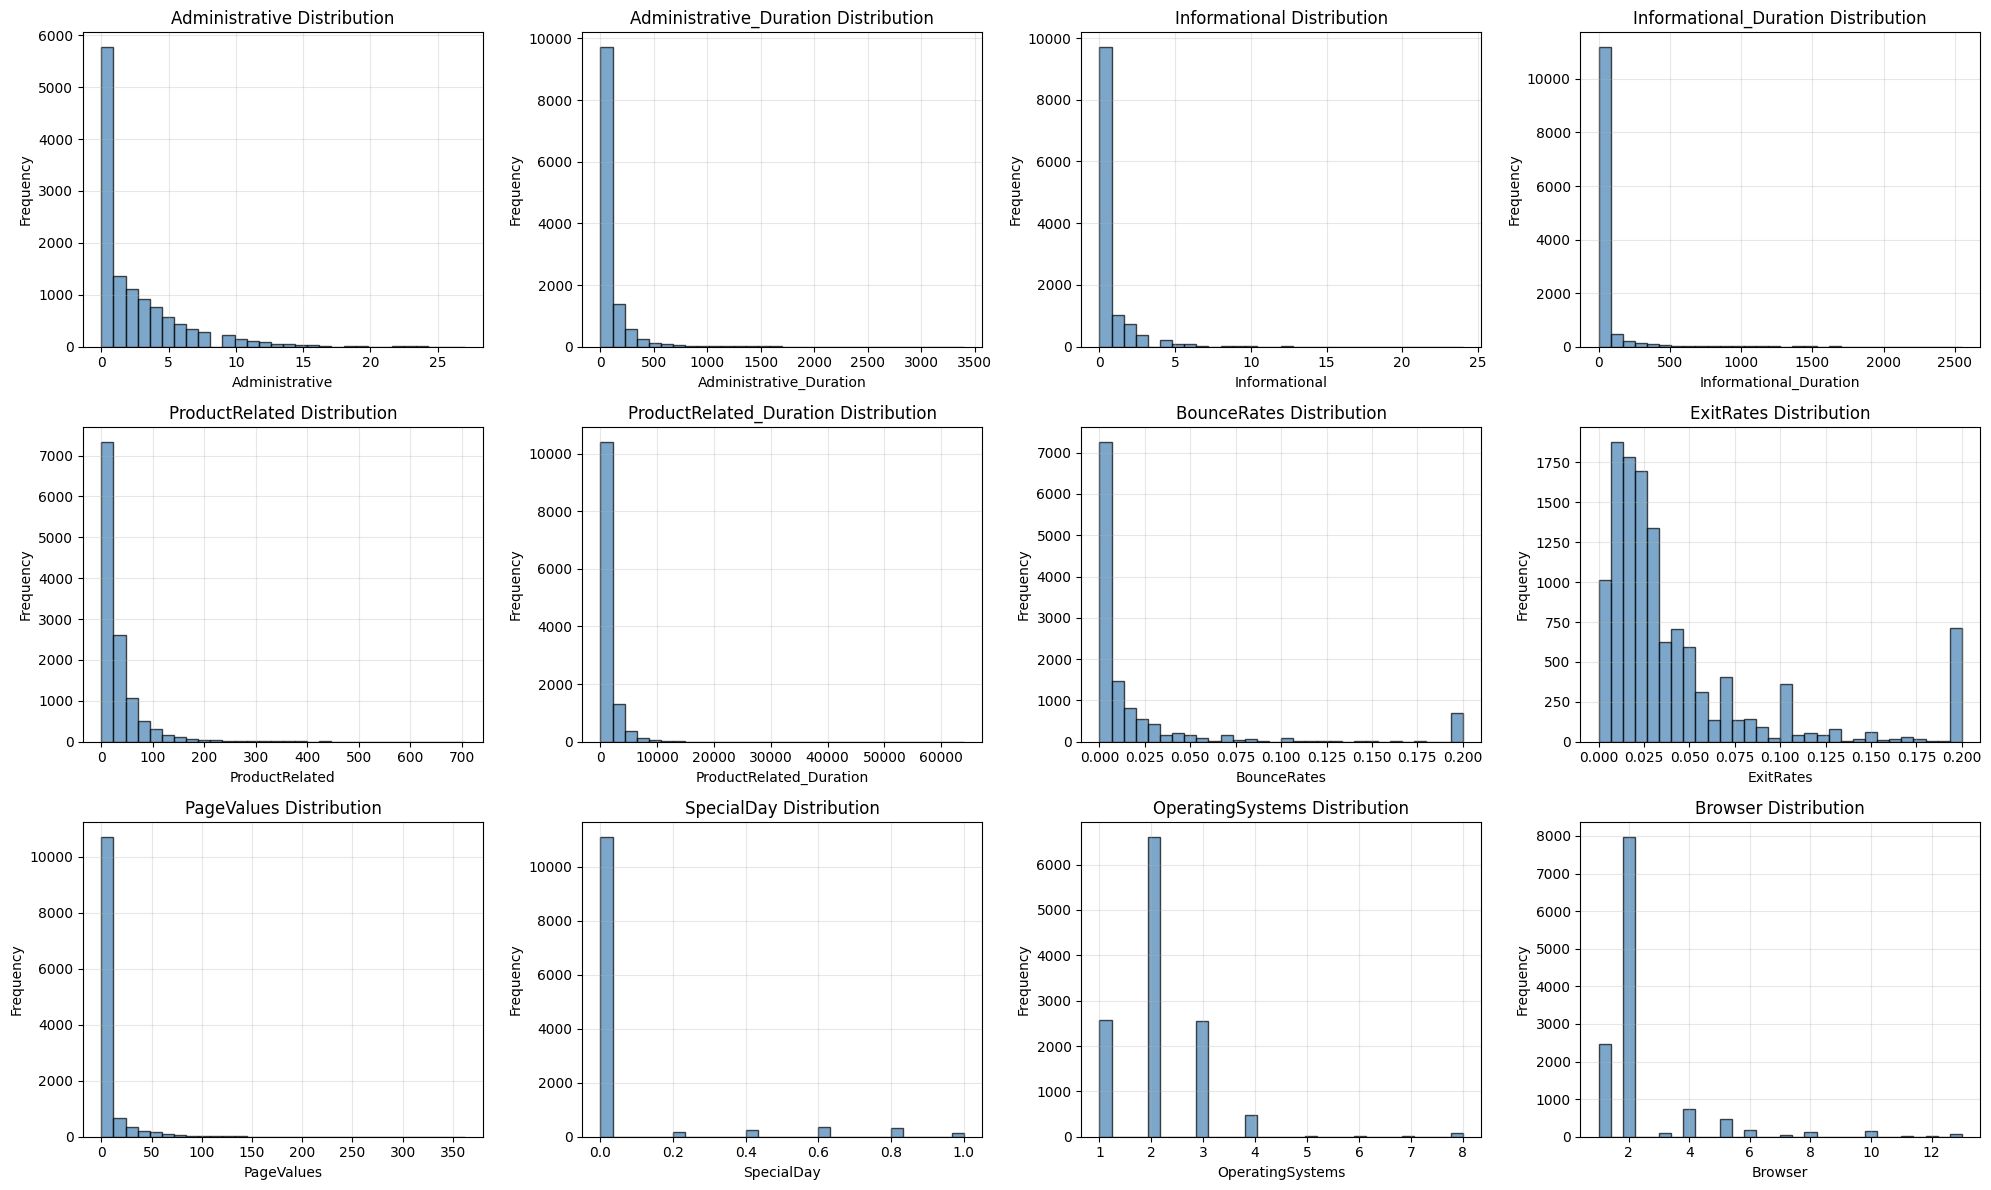

In [15]:
# 수치형 변수들의 히스토그램
numeric_columns = df.select_dtypes(include=[np.number]).columns
print(f"수치형 변수: {list(numeric_columns)}")

# 히스토그램 그리기
fig, axes = plt.subplots(3, 4, figsize=(20, 12))
axes = axes.ravel()

for i, col in enumerate(numeric_columns):
    if i < len(axes):
        axes[i].hist(df[col], bins=30, alpha=0.7, color='steelblue', edgecolor='black')
        axes[i].set_title(f'{col} Distribution', fontsize=12)
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
        axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

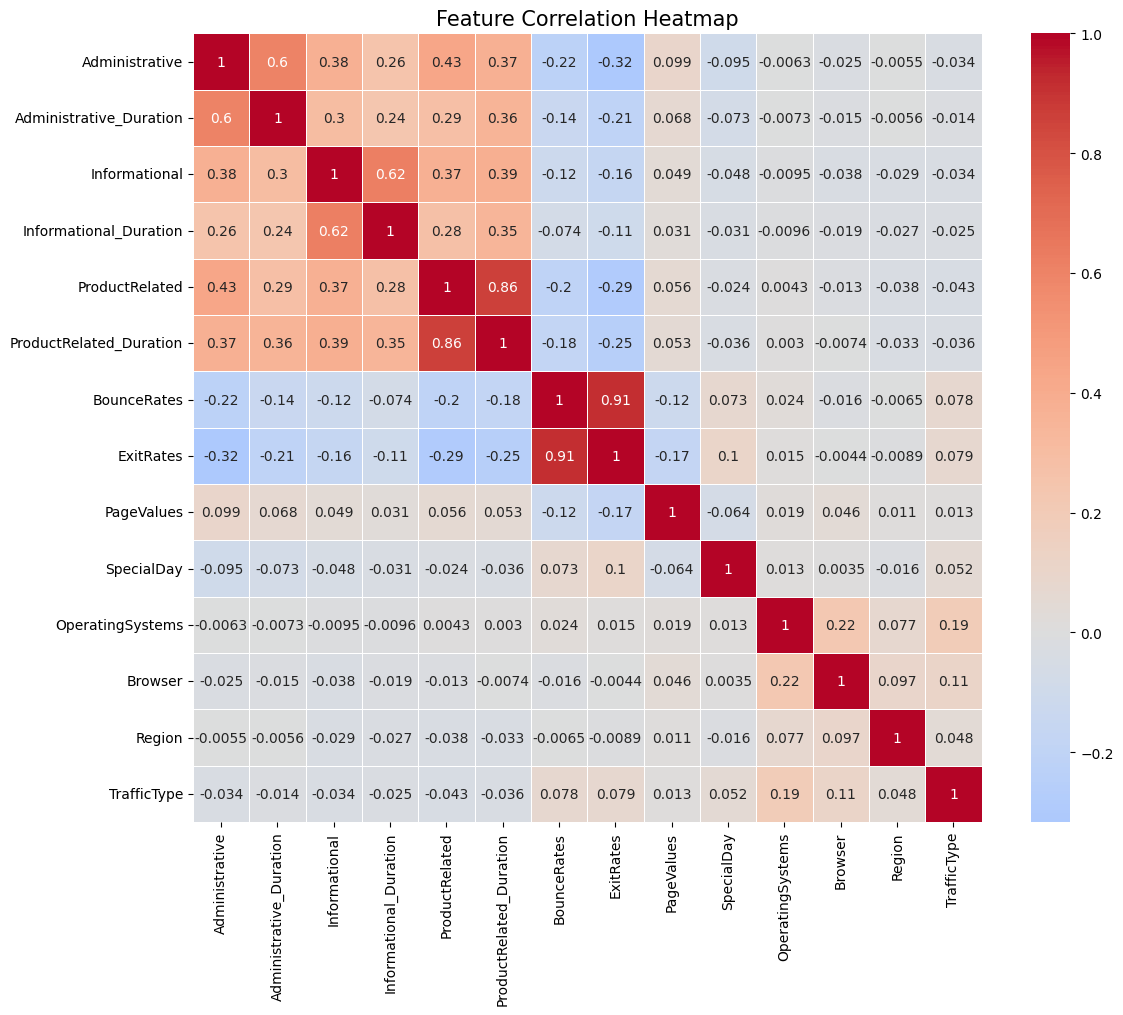

In [16]:
# 상관관계 분석
plt.figure(figsize=(12, 10))
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title('Feature Correlation Heatmap', fontsize=15)
plt.tight_layout()
plt.show()

=== Revenue 분포 ===
Revenue
False    10422
True      1908
Name: count, dtype: int64

구매 전환율: 0.1547 (15.47%)


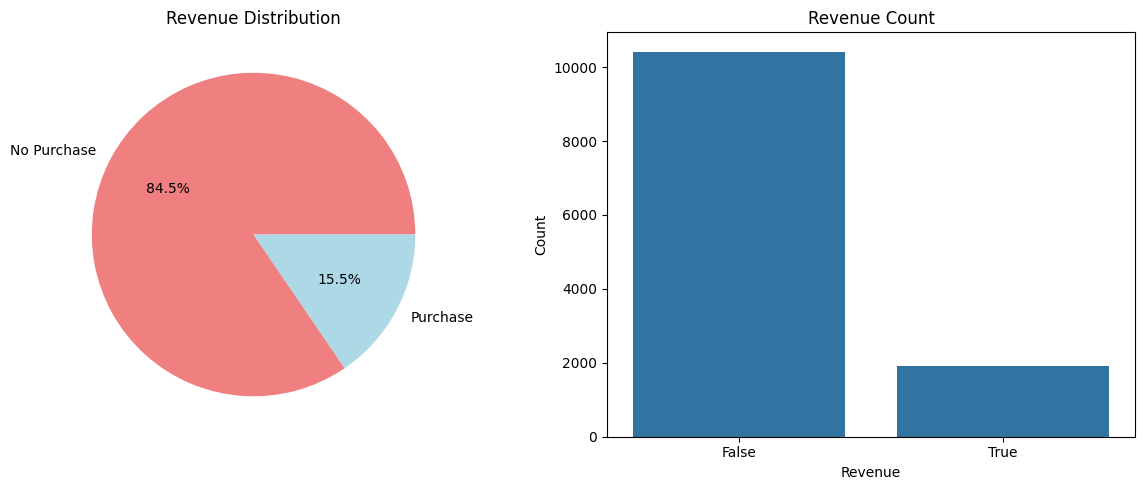

In [17]:
# 타겟 변수 분석
print("=== Revenue 분포 ===")
print(df['Revenue'].value_counts())
print(f"\n구매 전환율: {df['Revenue'].mean():.4f} ({df['Revenue'].mean()*100:.2f}%)")

# Revenue 분포 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 파이 차트
revenue_counts = df['Revenue'].value_counts()
axes[0].pie(revenue_counts.values, labels=['No Purchase', 'Purchase'], 
            autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
axes[0].set_title('Revenue Distribution')

# 바 차트
sns.countplot(data=df, x='Revenue', ax=axes[1])
axes[1].set_title('Revenue Count')
axes[1].set_xlabel('Revenue')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

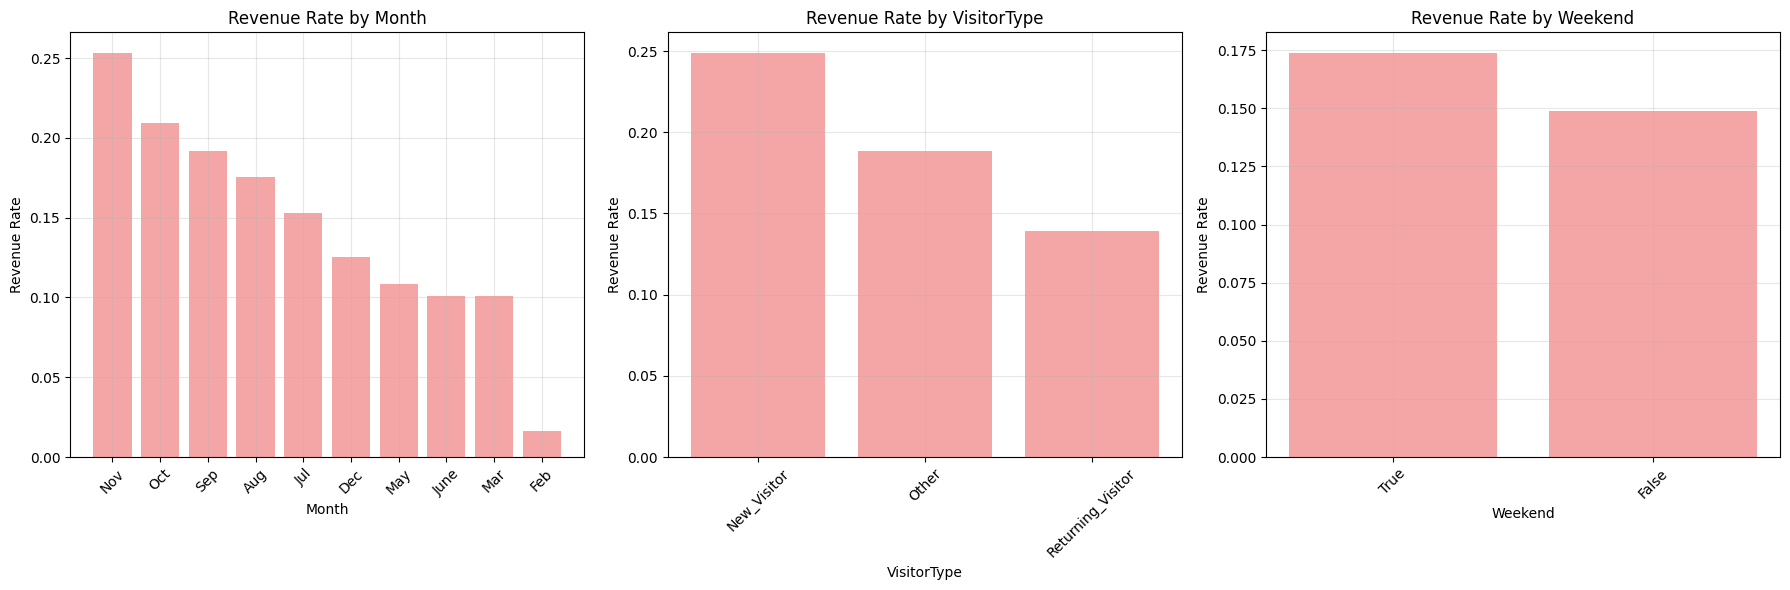

In [18]:
# 범주형 변수 분석
categorical_columns = ['Month', 'VisitorType', 'Weekend']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, col in enumerate(categorical_columns):
    # 각 범주별 Revenue 비율
    revenue_by_category = df.groupby(col)['Revenue'].mean().sort_values(ascending=False)
    
    axes[i].bar(range(len(revenue_by_category)), revenue_by_category.values, 
                color='lightcoral', alpha=0.7)
    axes[i].set_title(f'Revenue Rate by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Revenue Rate')
    axes[i].set_xticks(range(len(revenue_by_category)))
    axes[i].set_xticklabels(revenue_by_category.index, rotation=45)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

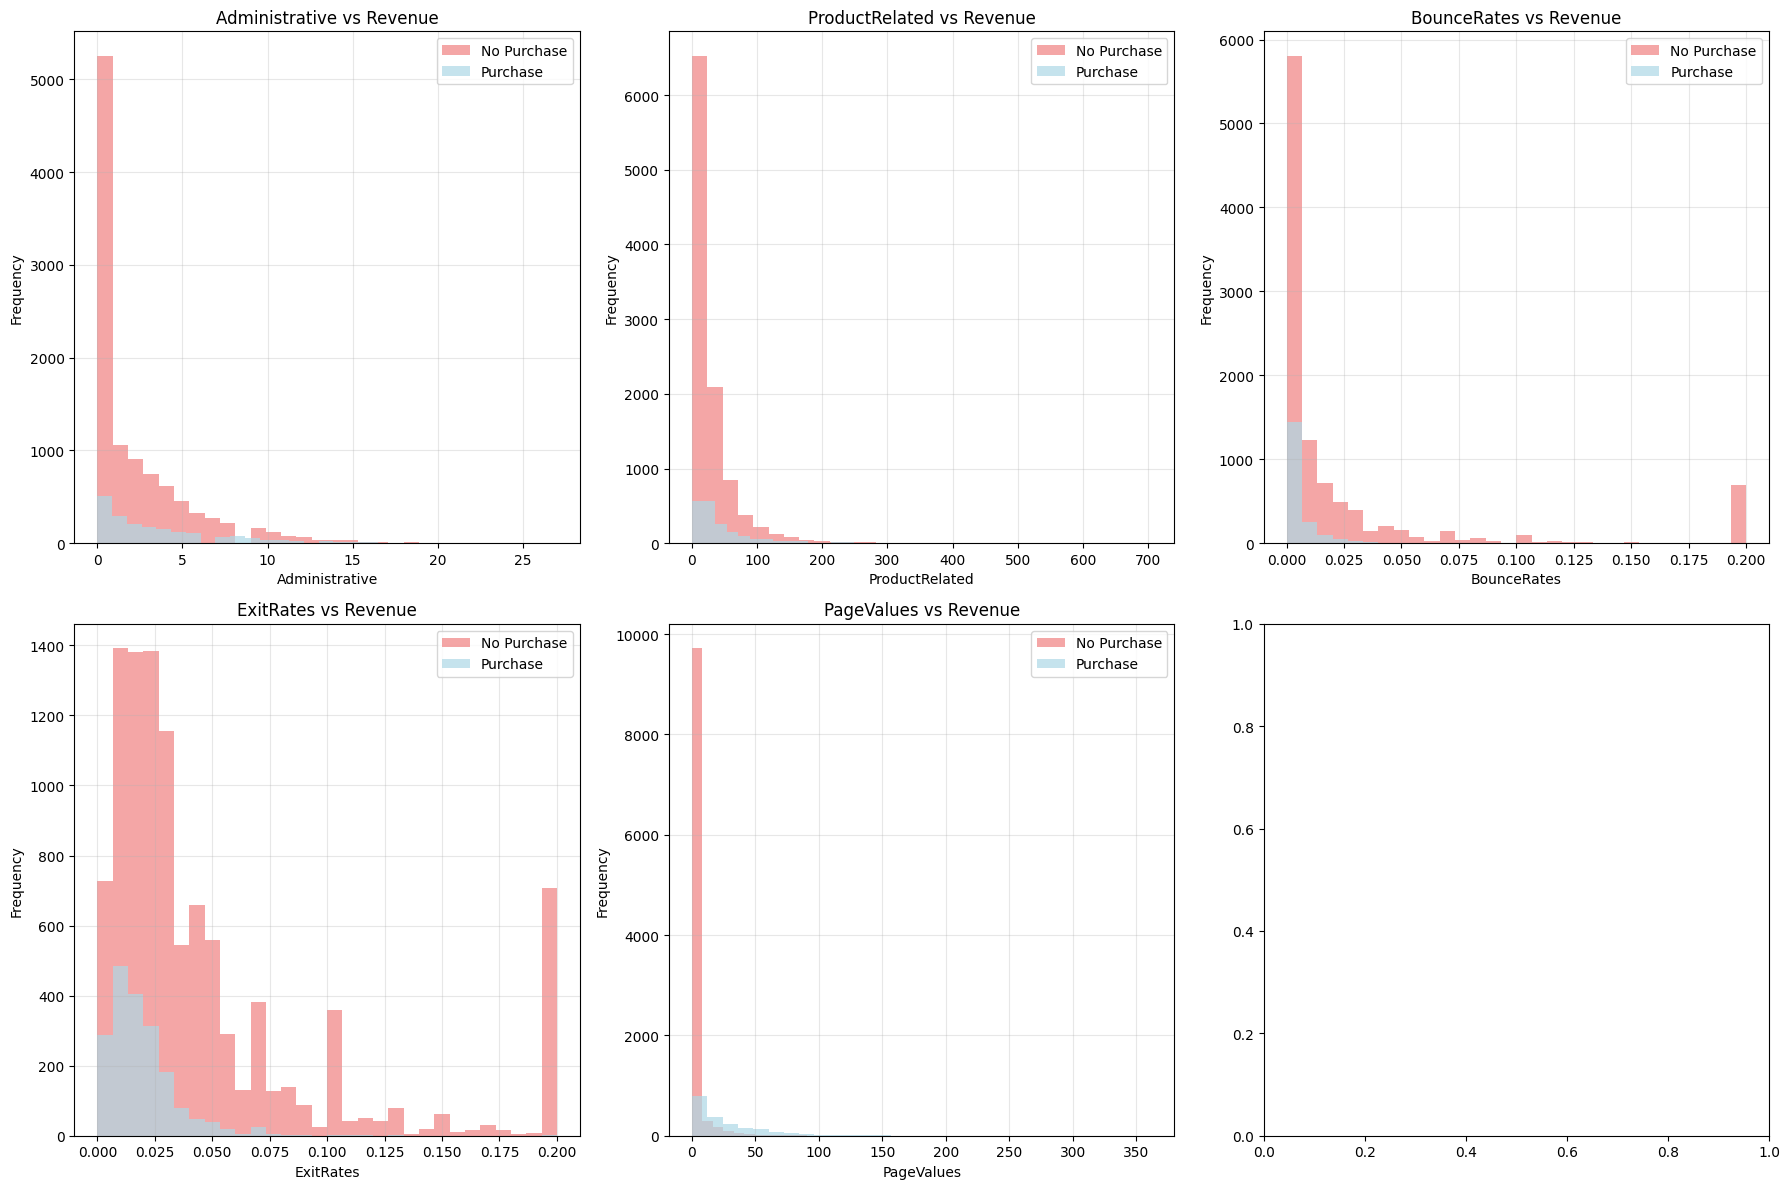

In [19]:
# 주요 수치형 변수와 Revenue의 관계
important_features = ['Administrative', 'ProductRelated', 'BounceRates', 'ExitRates', 'PageValues']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, feature in enumerate(important_features):
    if i < len(axes):
        # Revenue별로 분리하여 히스토그램
        axes[i].hist(df[df['Revenue']==False][feature], alpha=0.7, 
                    label='No Purchase', bins=30, color='lightcoral')
        axes[i].hist(df[df['Revenue']==True][feature], alpha=0.7, 
                    label='Purchase', bins=30, color='lightblue')
        axes[i].set_title(f'{feature} vs Revenue')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frequency')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

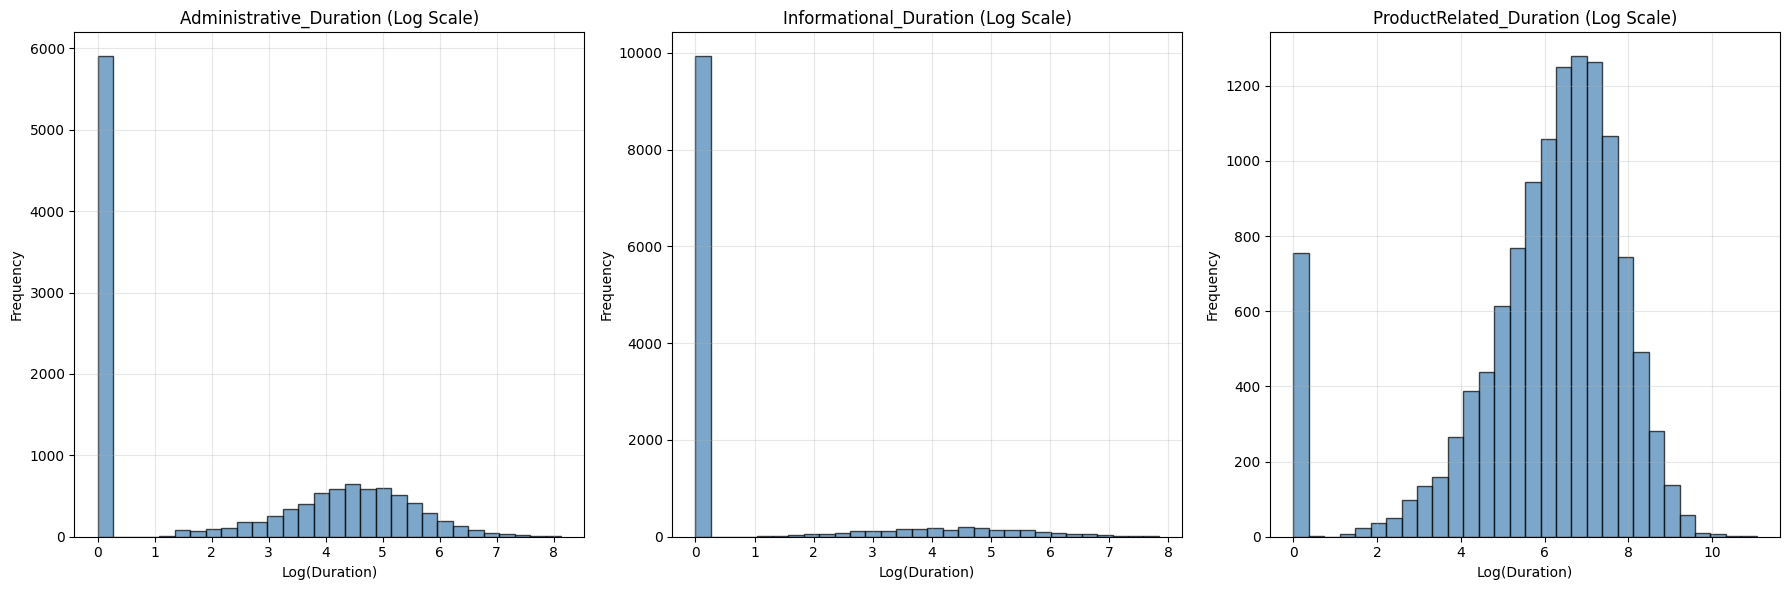


=== Duration 통계 ===
Administrative_Duration:
  평균: 80.82
  중앙값: 7.50
  최대값: 3398.75
  표준편차: 176.78

Informational_Duration:
  평균: 34.47
  중앙값: 0.00
  최대값: 2549.38
  표준편차: 140.75

ProductRelated_Duration:
  평균: 1194.75
  중앙값: 598.94
  최대값: 63973.52
  표준편차: 1913.67



In [20]:
# 체류 시간 관련 분석
duration_features = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, feature in enumerate(duration_features):
    # 로그 스케일로 히스토그램 (극값 제거)
    log_values = np.log1p(df[feature])  # log(1+x) 사용
    
    axes[i].hist(log_values, bins=30, alpha=0.7, color='steelblue', edgecolor='black')
    axes[i].set_title(f'{feature} (Log Scale)')
    axes[i].set_xlabel('Log(Duration)')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Duration 통계
print("\n=== Duration 통계 ===")
for feature in duration_features:
    print(f"{feature}:")
    print(f"  평균: {df[feature].mean():.2f}")
    print(f"  중앙값: {df[feature].median():.2f}")
    print(f"  최대값: {df[feature].max():.2f}")
    print(f"  표준편차: {df[feature].std():.2f}\n")

In [ ]:
# [과제 1] 구매 전환 예측 (Binary Classification)
# 목표: 사용자가 구매할지 안할지 예측
# 타겟변수: Revenue (True/False)

# 1. 로지스틱 회귀 (기본)
from sklearn.linear_model import LogisticRegression

# 2. 랜덤 포레스트 (불균형 데이터에 강함) 
from sklearn.ensemble import RandomForestClassifier

# 3. XGBoost (고성능)
import xgboost as xgb

# 4. SVM (비선형 관계 처리)
from sklearn.svm import SVC

# 5. 신경망 (복잡한 패턴 학습)
from sklearn.neural_network import MLPClassifier

In [ ]:
# [과제 2] 체류 시간 예측
# 목표: 사용자가 웹사이트에 얼마나 오래 머물렀는지 예측
# 타겟변수: Duration (분)

수치형 변수(14): Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType'],
      dtype='object')
